In [1]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
X = []
Y = []
for _ in range(100):
    x = np.random.randint(0,100)
    y = np.random.randint(0,100)
    
    X.append(x)
    Y.append(y)

df['X'] = X
df['Y'] = Y

In [3]:
df.to_csv('dataset.csv')

In [4]:
def euclidean_distance(X, Y):
    x1, y1 = X
    x2, y2 = Y
    x = abs(x1 - x2)
    y = abs(y1 - y2)
    
    return math.pow((math.pow(x,2) + math.pow(y,2)),0.5)

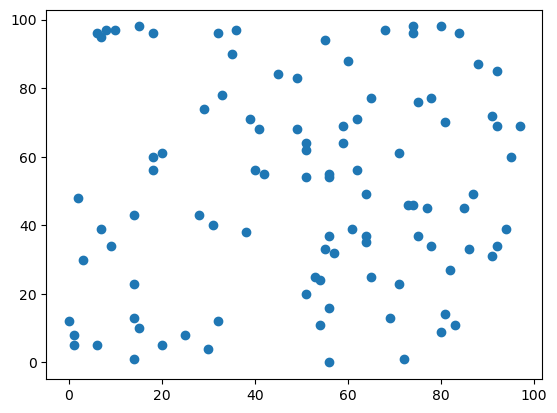

In [5]:
df = df[['X', 'Y']]
dataset = df.astype(float).values.tolist()
data = df.values

x_axis = []
y_axis = []

for point in data:
  x_axis.append(point[0])
  y_axis.append(point[1])

plt.scatter(x_axis, y_axis)
plt.show()

In [6]:
def k_means(df, k, max_iterations=100):
    centroids = {}
    
    for i in range(k):
        centroids[i] = df[i]
    
    for i in range(max_iterations):
        classes = {}
        for i in range(k):
            classes[i] = []
            
        for point in df:
            distances = [euclidean_distance(point, centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(point)

        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
                
        return classes

In [11]:
NO_OF_ITERATIONS = 100
NO_OF_CLASSIFICATION = 3

ans = k_means(data, NO_OF_CLASSIFICATION, NO_OF_ITERATIONS)

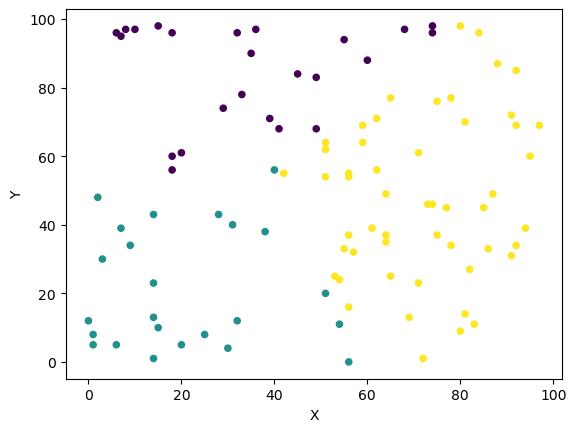

In [12]:
answer = {}
answer['X'] = []
answer['Y'] = []
answer['CLUSTER'] = []

for key, values in ans.items():
  for point in values:
    answer['X'].append(point[0])
    answer['Y'].append(point[1])
    answer['CLUSTER'].append(key)

new_df = pd.DataFrame(answer)
new_df.plot(kind='scatter', x='X', y='Y', color=answer['CLUSTER'])
plt.show()